In [ ]:
import matplotlib.pyplot as plt
import torch
path = "/media/data3/code/lzh/4DGaussian/output/hypernerf/chicken/point_cloud/iteration_14000/deformation.pth"
data = torch.load(path)
deformation_weights = {k: v for k, v in data.items() if 'deformation_net' in k}

In [ ]:
for key, value in deformation_weights.items():
    if value.ndim == 3:
        # Select a middle slice for 3D tensors
        slice_index = value.shape[0] // 2
        plt.figure(figsize=(8, 6))
        plt.imshow(value[slice_index].cpu().numpy(), cmap='viridis')
        plt.colorbar()
        plt.title(f'{key} (slice {slice_index})')
        plt.show()
    elif value.ndim == 2:
        # Visualize the entire 2D tensor
        plt.figure(figsize=(8, 6))
        plt.imshow(value.cpu().numpy(), cmap='viridis', aspect='auto')
        plt.colorbar()
        plt.title(f'{key}')
        plt.show()
    else:
        print(f"Skipping visualization for {key} with shape {value.shape}.")

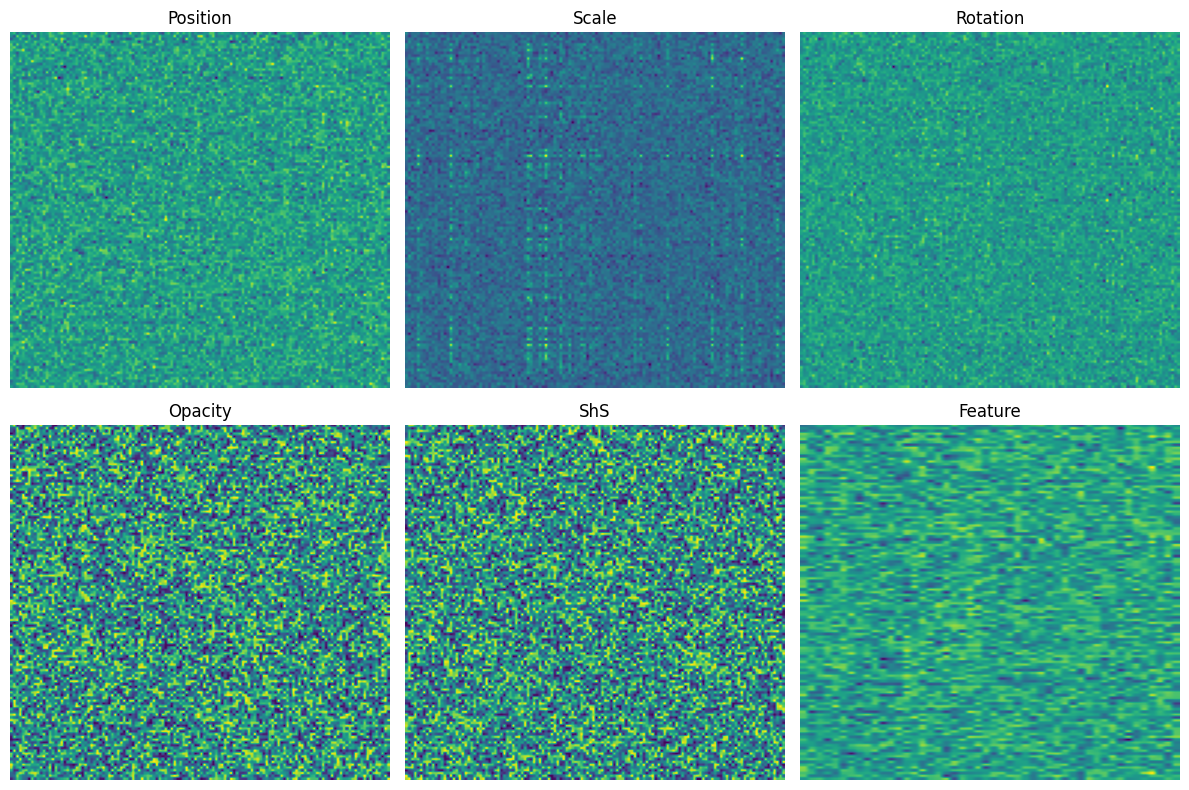

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

keys = [
    'deformation_net.pos_deform.1.weight',
    'deformation_net.scales_deform.1.weight',
    'deformation_net.rotations_deform.1.weight',
    'deformation_net.opacity_deform.1.weight',
    'deformation_net.shs_deform.1.weight',
    'deformation_net.feature_out.0.weight'
]

for i, key in enumerate(keys):
    ax = axes[i // 3, i % 3]
    weight = deformation_weights[key].cpu().numpy()
    ax.imshow(weight, cmap='viridis', aspect='auto')
    if key=="deformation_net.pos_deform.1.weight":
        ax.set_title("Position")
    if key=="deformation_net.scales_deform.1.weight":
        ax.set_title("Scale")
    if key=="deformation_net.rotations_deform.1.weight":
        ax.set_title("Rotation")
    if key=="deformation_net.opacity_deform.1.weight":
        ax.set_title("Opacity")
    if key=="deformation_net.shs_deform.1.weight":
        ax.set_title("ShS")
    if key=="deformation_net.feature_out.0.weight":
        ax.set_title("Feature")
    ax.axis('off')

plt.tight_layout()
plt.show()
